# Learning

- [intro pandas](#Intro-to-pandas)
- [univariate data](#Describing-univariate-data) : measures of tendency, spread
- [bivariate data](#Bivariate-data) : feature scaling, scatterplot
  - [feature scaling](#Feature-Scaling)
- [linear modeling](#Modeling)
  - [linear regression](#Linear-regression) : linear regression
  - [train-test validation](#Train,-test,-validation): train test split
  - [k-fold validation](#K-fold-validation): kfold validation
  - [regularization](#Regularization): Ridge regression, lasso regression
    - [ridge regression](#Ridge-Regresssion)
    - [lasso regression](#Lasso-Regresssion)
- [PCA](#PCA-and-dimensionality-reduction)
- [Classification](#Classification)
  - [K nearest neighbors](#K-nearest-neighbors)
  - [Logistic Regression](#Logistic-Regression)
  - [Decision trees](#Decision-Tree)
  - [Random Forest](#Random-forests)
  - [Concepts](#Concepts) : Grid search, Leave one-out validation, hard classifications vs soft classifications for decision trees

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Intro to pandas

### Locating elements with pandas

When you have a pandas series, you have two methods for accessing data: `series.iloc` and `series.loc`

- `series.iloc[n]` : gets the nth row of data of the series
- `series.loc[index]` : gets all entries that have the specified index in the series.

`series.iloc` will only ever return one entry, while `series.loc` can return multiple entries if there are duplicate indices in the series

In [3]:
series = pd.Series(["Ford", "Vasiliu", "Willner", "Vasiliu"], index=["DATA201","DATA301","DATA201","DATA201"])

In [4]:
series

DATA201       Ford
DATA301    Vasiliu
DATA201    Willner
DATA201    Vasiliu
dtype: object

In [5]:
series.iloc[0]

'Ford'

In this specific example, we get back all entries that have a named index of "DATA201". Multiple elements have that index, so multiple entries are returned as a sub-series. 

In [8]:
series.loc["DATA201"] # multiple elements returned since duplicate series

DATA201       Ford
DATA201    Willner
DATA201    Vasiliu
dtype: object

### Reading in data and looking at it

**`pd.read_csv()`**

In this example, the `pd.read_csv(filepath)` method takes in a filepath to a csv and returns a dataframe. To specify the separator if it's different, use the `sep` keyword. 

It then returns a dataframe

In [2]:
df = pd.read_csv("./data/test_data_v2.csv", sep=",")
df

,Continent,Country,Year,Tourism_expenditure,Arrivals
0,Africa,Dem. Rep. of the Congo,1995,NaN,35.0
1,Africa,Dem. Rep. of the Congo,2005,3.0,61.0
2,Africa,Dem. Rep. of the Congo,2010,11.0,81.0
3,Africa,Dem. Rep. of the Congo,2017,6.0,NaN
4,Africa,Dem. Rep. of the Congo,2018,61.0,NaN
5,Africa,Dem. Rep. of the Congo,2019,100.0,NaN
6,Europe,Denmark,1995,3691.0,NaN
7,Europe,Denmark,2005,5293.0,9178.0
8,Europe,Denmark,2010,5704.0,8744.0
9,Europe,Denmark,2017,8508.0,12426.0


**data describing methods**

- `df.head()` : return first 5 entries as dataframe
- `df.tail()` : return last 5 entries as dataframe
- `df.describe()` : return numerical aggregation data on all numerical columns. 

In [8]:
df.head()

,Continent,Country,Year,Tourism_expenditure,Arrivals
0,Africa,Dem. Rep. of the Congo,1995,NaN,35.0
1,Africa,Dem. Rep. of the Congo,2005,3.0,61.0
2,Africa,Dem. Rep. of the Congo,2010,11.0,81.0
3,Africa,Dem. Rep. of the Congo,2017,6.0,NaN
4,Africa,Dem. Rep. of the Congo,2018,61.0,NaN


In [9]:
df.tail()

,Continent,Country,Year,Tourism_expenditure,Arrivals
12,Africa,Djibouti,1995,5.0,21.0
13,Africa,Djibouti,2005,7.0,30.0
14,Africa,Djibouti,2010,18.0,51.0
15,Africa,Djibouti,2017,36.0,NaN
16,Africa,Djibouti,2018,57.0,NaN


### Dataframe properties

- `df.shape` : returns rows x columns tuple of dataframe
- `df.dtypes` : returns a series of the columns and explains their data types
- `df.columns` : returns a index of the column names in the dataframe

In [6]:
df.dtypes

Continent               object
Country                 object
Year                     int64
Tourism_expenditure    float64
Arrivals               float64
dtype: object

In [7]:
df.columns

Index(['Continent', 'Country', 'Year', 'Tourism_expenditure', 'Arrivals'], dtype='object')

### Dataframe indexing

Using bracket notation we can access individual or multiple columns. 

Accessing a column by its column name returns a series, while accessing a list of column names returns a data frame. 

- `df[column_name]` : returns a series of the specified column. Returns `Series`
- `df[[col1, col2, col3]]` : returns a dataframe including all the different columns. Returns `DataFrame`

In [10]:
# returns series
df['Continent'] 

0     Africa
1     Africa
2     Africa
3     Africa
4     Africa
5     Africa
6     Europe
7     Europe
8     Europe
9     Europe
10    Europe
11    Europe
12    Africa
13    Africa
14    Africa
15    Africa
16    Africa
Name: Continent, dtype: object

In [11]:
df[['Continent', 'Country', 'Year']]

,Continent,Country,Year
0,Africa,Dem. Rep. of the Congo,1995
1,Africa,Dem. Rep. of the Congo,2005
2,Africa,Dem. Rep. of the Congo,2010
3,Africa,Dem. Rep. of the Congo,2017
4,Africa,Dem. Rep. of the Congo,2018
5,Africa,Dem. Rep. of the Congo,2019
6,Europe,Denmark,1995
7,Europe,Denmark,2005
8,Europe,Denmark,2010
9,Europe,Denmark,2017


### Dealing with Missing data

- `df.isnull()` : returns a boolena dataframe where the element is `True` if null, `False` if not null
- `df.dropna(subset=col_list)` : drops all missing data in the columns specified in the `col_list`, which is a list of the column names to drop from. 

### Series Aggregation methods

- `series.mean()` : returns the mean of the series
- `series.max()` : returns the max of the series
- `series.min()` : returns the min of the series

### Series conditionals

To find all values in a series that equal "turtle", we can write code like this: 

```python
series == "turtle"
```

All boolean expressions with conditionals will return a **boolean series** where every value in the series is a boolean

In [12]:
series = pd.Series(["turtle", "potato", "turtle", "potato"])

In [13]:
series == "turtle"

0     True
1    False
2     True
3    False
dtype: bool

### Numpy array basics



#### Numpy array properties

Here are some important properties on a numpy array:

- `arr.dtype` : returns the data type of the array
- `arr.ndim` : returns the number of dimensions of the array. Returns `int`
- `arr.shape` : returns a tuple representing the size of each dimension in the array

#### Creating numpy arrays

For all these array creation methods, they return a numpy array, and for the parameter they take in, it can be either a single number or a tuple. 

- If single number: means the resulting array will be one-dimensional, and the number you pass in specifies the size of the array
- If tuple of numbers: represents the dimensional shape

So here are all the useful array creation methods:

- `np.zeros()` : creates array where every element is 0
- `np.ones()` : creates array where every element is 1
- `np.empty()` : creates array where every element is empty
- `np.arange(start, stop, step)` : creates an array where elements are drawn from this incrementing range

In [3]:
# LEVEL 1: 1D data

print(np.zeros(5))
print(np.ones(5))
print(np.empty(5))
print(np.arange(1, 5))

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1 2 3 4]


In [4]:
# LEVEL 2: Multiple dimensions

# to create an array with multiple dimensions, pass in a shape tuple into these methods

np.zeros((5 , 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

#### Numpy data types casting

**METHOD 1: add dtype property**

To cast an array as soon as you create it, pass the `dtype=` keyword arg into the `np.array()` method. Here is the basic syntax:

```python
np.array(arr, dtype=data_type)
```

**METHOD 2: use asstype()**

The `arr.astype(data_type)` method returns the array casted to the specified data type. 

In [5]:
# starts out as int array

arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int64')

In [9]:
# cast to float array

new_arr = arr.astype(float)
new_arr.dtype

dtype('float64')

#### Reshaping data

FOr reshaping data, all the methods below return a new modified array that has a different shape than the original, but it doesn't modify the original. 

- `arr.reshape(shape_tuple)` : takes in a tuple representing the sizes for each dimension and reshapes the array accordingly
- `arr.ravel()` : flattens the array to 1 dimension
- `arr.flatten()` : flattens the array to 1 dimension

#### Numpy aggregation methods

Using numpy aggregation methods lives on the `np` object from numpy itself. There are different ways to change the aggregation behavior of these methods, depending on the `axis` property. 

- **default** : aggregates over all of the elements, returning a single value
- **`axis=0`** : creates final aggregate value for each column. Returns an array, whose length is the number of columns. Aggregates down the rows to create a total for each column.
- **`axis=1`** : creates final aggregate value for each row. Returns an array, whose length is the number of rows. Aggregates left to right on the columns to create a total for each row.

And here are all the aggregation methods: 

- `np.sum(arr)` : gets the sum
- `np.mean(arr)` : gets the mean
- `np.min(arr)` : gets the min
- `np.max(arr)` : gets the max

In [3]:
arr = np.linspace(0, 10, 15).reshape((3,5))
arr

array([[ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286],
       [ 3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143],
       [ 7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ]])

In [ ]:
print(np.mean(arr))  # sums all elements
print(np.mean(arr, axis=0)) # mean of each column (summing down by rows)
print(np.mean(arr, axis=1)) # mean of each row (summing right by columns)

In [6]:
np.random.seed(71)
np.sum(np.random.randint(10, 21, (1, 100)))

1464

## Describing univariate data

### Intro to stats

- **nominal data** : categorical data with no order to the data
- **ordinal data** : categorical data with order to the data and labels
- **continuous data** : numerical data that includes decimals
- **discrete data** : numerical data that includes only integers or a finite collection of integers.

### Measures of central tendency

Based on the skewness of the distribution, these facts are guaranteed:

- **Symmetric** : mean = median
- **Right skewed** : mean > median
- **Left Skewed** : mean < median

<div class="alert alert-info">
When data is skewed, the best measure of central tendency is the median and the best measure of spread is the IQR.
</div>

Here are the methods to get measures of central tendency: 

- `np.mean(arr)` : gets the mean of the data
- `np.median(arr)` : gets the median of the data

**Best measures of central tendency for each situation**

- **Median** : when dealing with ordinal data or with skewed data
- **Mean** : When dealing with evenly distributed data like in a normal distribution

### Measures of spread

- **variance** : we can use the `np.var(arr)` method to get the variance of the data within a vector.
- **standard deviation** : we can use the `np.std(arr)` method to get the standard deviation of the data within a vector.
- **coefficient of variation** : the coefficient of variation is the standard deviation divided by the mean, $\frac{\sigma}{\mu}$.

<div class="alert alert-warning">
    If you try to calculate the coefficient of variation on standard scaled data, then you will get an error because standard scaled data always has a mean = 0 and variance = 1, thus 1 / 0 nets you undefined.
</div>


In [4]:
x = np.random.randn(20)

print("standard deviation:", np.std(x))
print("variance:", np.var(x))
print("coefficient of variation", np.std(x) / np.mean(x))

standard deviation: 1.0902109621927198
variance: 1.1885599420851762
coefficient of variation 3.4092197684483057


### Getting better resolution

We use **log transformation** to get better resolution on a plot where our data varies widely between magnitudes, like on a range from 1,000 - 350,000.

- `np.log10(arr)` : applies base 10 log to all elements in the array. Returns new array
- `np.log(arr)` : applies natural log to all elements in the array. Returns new array

We want to apply the log 10 transformation on our features that vary widely in magnitude. 

### Box plots

Box plots help us see measures of spread and central tendency. It's unique shape tells us a lot about the data: 

- **bottom of box** : Q1, 25th percentile of data
- **middle line** : Q2, the median, at 50th percentile of data
- **top of box** : Q3, at 75th percentile of data
- **bottom whisker** : $\mathrm{Q1} - 1.5\mathrm{IQR}$
- **top whisker** : $\mathrm{Q3} + 1.5\mathrm{IQR}$ 

We consider a data point to be an outlier if it lies beyond the bounds of the bottom and top whiskers, or in other words, if it is greater than than $1.5(IQR)$ outside the bounds of the min and max

In [5]:
arr = np.array([*np.random.randint(3, 20, 10), 60])
arr

array([ 6, 18, 16,  9, 19, 14,  3,  5, 11,  4, 60])

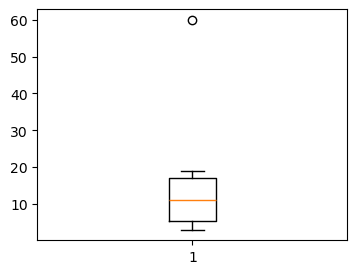

In [11]:
plt.figure(figsize=(4,3))
plt.boxplot(arr)
plt.show()

## Bivariate data

### Correlation coefficient

Use the `np.corrcoef(x,y)` method to return a matrix of the two fields and how they correlate with each other. 

You can then create a scatterplot of the data with `plt.scatter(x, y)` to fact check the correlation.

In [ ]:

def create_correlation_heatmap(dataframe: pd.DataFrame):
    # 1. clean up dataframe to have numerical data only and drop null rows
    numerical_df = dataframe[dataframe.select_dtypes(include='number', exclude='object').columns]
    numerical_df = numerical_df.dropna()
    cols = list(numerical_df.columns)

    #2. run correlation coefficient matrix
    corr_matrix = np.corrcoef(numerical_df[cols], rowvar=False)
    mask = np.triu(corr_matrix)

    #3. plot heatmap
    sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,
                annot=True, fmt='.2f', xticklabels=cols[:-1], yticklabels=['']+cols[1:],
            mask = mask)
    plt.tick_params(size = 0, labelsize = 12)
    plt.xticks(rotation = 90)
    plt.show()

#### Creating a correlation heatmap

With the method below, we can clean up a dataframe data, make a correlation matrix from it, and then plot it's heatmap easily

In [1]:
def create_correlation_heatmap(dataframe: pd.DataFrame):
    # 1. include only numerical columns
    numerical_df = dataframe[dataframe.select_dtypes(include='number', exclude='object').columns]

    # 2. drop na
    numerical_df = numerical_df.dropna()
    cols = list(numerical_df.columns)

    # 3. create correlation matrix
    corr_matrix = np.corrcoef(numerical_df[cols], rowvar=False)
    mask = np.triu(corr_matrix)

    # 4. plot
    sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,
                annot=True, fmt='.2f', xticklabels=cols[:-1], yticklabels=['']+cols[1:],
            mask = mask)
    plt.tick_params(size = 0, labelsize = 12)
    plt.xticks(rotation = 90)
    plt.show()

NameError: name 'pd' is not defined

### Feature Scaling

We want to ensure that all features in a dataset have a similar range, on the level of $-1 \le x \le 1$. 

To do this, we divide each value of a feature by the range of the feature, like so: $\frac{x}{s}$

**Motivation**

Why do we want to do feature scaling? Imagine you have a set of three students: 

- Student A: 1400 SAT, 4.0 GPA
- Student B: 1400 SAT, 2.0 GPA
- Student C: 1460 SAT, 4.0 GPA

We would say that Student A and C are more similar, since they have the same GPA, and similar SAT scores, but that's not what happens here. 

The change is weighted more towards SAT because it lies on a range of 0-1600, while the GPA is on a range of 0-4.

**Standard scaling**

Standard scaling fits features to a normal distribution, making each feature have a mean $\mu=0$ and a standard deviation $\sigma=1$

The formula for standard scaling is this: 

$$\frac{x - \mu}{\sigma}$$

You subtract the mean from each feature value, and then divide that by the standard deviation.

This is the exact same thing as the Z-score. It returns the z-score of each feature value, about how many standard deviations the observation is from the mean.

<div class="alert alert-info">
    Each feature scaled with standard scaling will always have a mean = 0 and standard deviation = 1.
</div>

**Min/max scaling**

Min max scaling follows this formula:

$$\frac{x - min}{range}$$

What's important about this is that all scaled values will be within the range 0-1



In [1]:
student_a = (1400, 4)
student_b = (1400, 2)
student_c = (1460, 4)

students = [student_a, student_b, student_c]

# 1. GET ranges
SAT_RANGE = 1600 - 400
GPA_RANGE = 4 - 0

# 2. Scale by range
scaled_students = [(x[0]/SAT_RANGE, x[1]/GPA_RANGE) for x in students]
scaled_students

[(1.1666666666666667, 1.0),
 (1.1666666666666667, 0.5),
 (1.2166666666666666, 1.0)]

In [14]:
import math

def norm(x1, y1, x2, y2):
    return round(math.sqrt((x2 - x1)**2 + (y2-y1)**2), 3)

distances = [
    norm(*scaled_students[0], *scaled_students[1]), # student A vs student B
    norm(*scaled_students[0], *scaled_students[2]), # student A vs student C
    norm(*scaled_students[1], *scaled_students[2])  # student B vs student C
]

# from the distances, we can see student A is closest to student C
distances

[0.5, 0.05, 0.502]

Now let's do an example with standard scaling.

In [17]:
sat_scores = np.array([1400, 1460, 1400, 1200])
gpa = np.array([3.5, 2.5, 4.0, 3.8])

def feature_scale(arr):
    return (arr - np.mean(arr))/np.std(arr)

feature_scaled_sat = feature_scale(sat_scores)
feature_scaled_gpa = feature_scale(gpa)

In [22]:
print(feature_scaled_sat)
print(feature_scaled_gpa)

[ 0.35583     0.96582428  0.35583    -1.67748427]
[ 0.086711   -1.64750894  0.95382097  0.60697698]


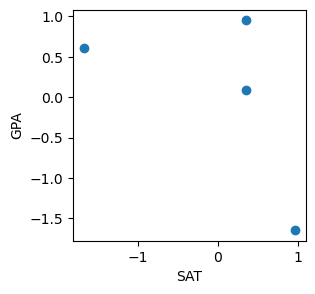

In [21]:
plt.figure(figsize=(3, 3))
plt.scatter(feature_scaled_sat, feature_scaled_gpa)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

#### Feature scaling with standard scaler

We can get access to a standard scaler through the sklearn library, like so: 

```python
from sklearn.preprocessing import StandardScaler as SS
standard_scaler = SS()
```

- `ss.fit_transform(df)` : takes in a dataframe or another 2D array, and then feature scales all the feature columns. It returns the scaled dataframe or array.
- `ss.fit(df)` : calculates mean and standard deviation of data and stores it in the `ss` object. Returns `None`
- `ss.transfom(df)` : feature scales the data after you call `ss.fit()`. Only does this for standard scaler, but applies fitted parameters to data

These three methods do different things depending on which object instance of sklearn you use. Here is how they work in general: 

- `.fit()` : fits the data to the model
- `.transform()` : transforms the model
- `.fit_transform()` : fits the data to the model, and then returns the transformed data.

In [2]:
from sklearn.preprocessing import StandardScaler

In [19]:
sat_scores = np.array([1400, 1460, 1400, 1200])
gpa = np.array([3.5, 2.5, 4.0, 3.8])

data = np.vstack([sat_scores, gpa]).T
students = pd.DataFrame(data=data, columns=["SAT score", "GPA"])
students

,SAT score,GPA
0,1400.0,3.5
1,1460.0,2.5
2,1400.0,4.0
3,1200.0,3.8


In [20]:
standard_scaler = StandardScaler()

In [25]:
scaled_df = standard_scaler.fit_transform(data)

In [26]:
scaled_df

array([[ 0.35583   ,  0.086711  ],
       [ 0.96582428, -1.64750894],
       [ 0.35583   ,  0.95382097],
       [-1.67748427,  0.60697698]])

## Modeling

### Linear regression

For linear regression, the hypothesis will be a linear equation with any amount of features. This can be univariate or multivariate linear regression: 

$$h_\beta (x) = \beta_0 + \beta_1 x $$
$$ h_\beta (x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... $$

The goal in linear regression is to minimize the squared error consisting of all the data points: 

$$C = \sum (\hat{y} - y)^2$$

**SKLearn linear regression**

1. Import the `LinearRegression` class and instantiate it

    ```python
    from sklearn.linear_model import LinearRegression as LR
    lr = LR()
    ```
    
2. Fit the model to the data using `lr.fit()`

    ```python
    lr.fit(x, y)
    ```
    
3. Get the predicted data $\hat y$ back with `lr.predict()`

   ```python
   y_hat = lr.predict(x)
   ```

Here are the methods and properties available on the linear regression instance: 

- `lr.coef_` : the 2D matrix of coefficients for the features (parameters)
- `lr.intercept_` : the 1D array of intercepts
- `lr.score(x, y)` : returns an $R^2$ score for the data, showing how well the model's features fit the target.
- `lr.fit(x, y)` : fits data to linear regression model
- `lr.predict(x)` : returns the array of predictions that the model makes

**Coefficient of determination**

THe coefficient of determination is $R^2$, and has bounds $(-\infty, 1]$. 

*ONLY* in two dimensions, then you have a correlation coefficient $r$ which is just the square root of the coefficient of determination. 

$$r = \sqrt{R^2}$$

The null model is just predicting the mean, which means that the null model has an $R^2$ value = 0


**Mean squared error**

MSE is a better error metric for models created based on the exact same data.

You can only compare model performance with MSE if the models are based on the same data.

This is how we'll use scikit learn to do meane squared error: 

1. Import the `mean_squared_error()` method from scikit learn

   ```python
   from sklearn.metrics import mean_squared_error
   ```

2. The method takes in two arguments: the model's prediction and the expected values. Both should be numpy arrays

    ```python
    mean_squared_error(y_hat, y)
    ```
**Euclidian squared distance**

THe euclidean squared distance is just the distance formula squared. Essentially we do it because we don't need to square root everything, making ti less computationally expensive to compute. 

**Coefficient of variation**

THe coefficient of variation is another way to tell how spread out our data is. It's just the standard deviation divided by mean, and then we multiply by 100 to get a percentage. 

It's useful because it works no matter whether your data is scaled or unscaled. 

$$CV = \frac{\mathrm{standard \ deviation}}{\mathrm{mean}} \cdot 100$$

- A low CV means the data points tends to be close to the mean
- A high CV means the data points tend to be farther away from the mean, spread out over a wide range.

**Null model**

The null model will just predict that every point is equal to the mean, giving a straight line. Then from there, we can get the coefficient R^2, which is the coefficient of determination.

$$R^2 = 1 - \frac{\mathrm{Sum \ of \  actual \ squared \  errors}}{\mathrm{Sum\  of\  squared\  errors\  using \ \ null\  model}}$$

You can also think of it like this: 

$$R^2 = 1 - \frac{\sum (\hat y - y)^2}{\sum (\hat y - \mu)^2}$$

In [3]:
# 1. import the linear regression object
from sklearn.linear_model import LinearRegression as LR

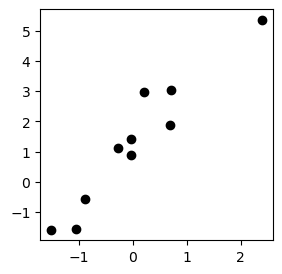

In [7]:
# 2. create data
np.random.seed(146)
x = np.random.normal(size=(10,1))
noise_strength = 0.5
noise = np.random.normal(scale=noise_strength, size=(10,1))
y = 1 + 2*x + noise
plt.figure(figsize=(3,3))
plt.scatter(x,y, label='Original data', color='k')
plt.show()

In [8]:
# 3: run linear regression

lr = LR()
lr.fit(x, y)

LinearRegression()

In [10]:
# 4: get predictions from hypothesis

y_hat = lr.predict(x)
y_hat

array([[ 5.77218448],
       [ 1.18729095],
       [-0.7249848 ],
       [-0.40065615],
       [ 2.5548401 ],
       [ 0.72398075],
       [-1.61163342],
       [ 2.57138316],
       [ 1.19973579],
       [ 1.64945564]])

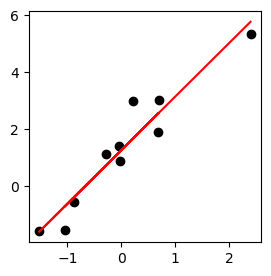

In [13]:
# 5. plot line

plt.figure(figsize=(3,3))
plt.scatter(x,y, label='Original data', color='k')
plt.plot(x, y_hat, color='r')
plt.show()

In [ ]:
# 6. create model

def predict(x):
    model = np.dot(lr.coef_, x) + lr.intercept_
    return model

#### Scaling in OLS

For regression with OLS, scaling is not required. When scaling, you only scale the features. You never scale the target because doing so would require you to undo the scaling later.

> There's a reason why we call it feature scaling. We only scale the features.

The parameters and intercepts will change to account for any changes when you scale the data, but you will end up with the same model. 

i>}
</style>


<div class="alert alert-info">It does not matter whether or not you do feature scaling for regression since you will end up with the same result.</div>

#### Standard Scaling

Here are the rules for standard-scaling data with linear regression: 

- Only scale the features, not the target
- Only scale the test data based on the specs (mean and standard deviation) from the training data.
- Any time you are predicting data, any input data must also be scaled using the mean and standard deviation calculated from the model.

<div class="alert alert-info">Always scale the test features with the same scalar spes as the training data</div>

In [ ]:
ex_Xtrain = np.array([[56,5], [53,3], [94,4], [78,8],[15,5], [34,4], [53,5], [44,4]])
ex_Ytrain = np.array([51, 51, 95, 82, 16, 29, 55, 49])
ex_Xtest = np.array([[98, 6], [53,4]])
ex_Ytest = np.array([81,38])

In [1]:
from sklearn.preprocessing import StandardScaler as SS

# 1. create standard scaler
ss = SS()

# 2. fit standard scaler to training data features
ss.fit(ex_Xtrain)

# 3. scaled both training and testing data with scaler (based on training specs)
scaled_Xtrain = ss.transform(ex_Xtrain)
scaled_Xtest = ss.transform(ex_Xtest)

NameError: name 'ex_Xtrain' is not defined

### Train, test, validation

**overfitting and underfitting**

When we overfit a data set, essentially the model just well on the training data but fails to generalize on the testing data. It means training score is less than testing score.

When we underfit a data set, it performs poorly on both the training set and and test set.

- **internal validity** : how well the model performs on the training data
- **external validity** : how well the model performs on the test data

#### Train test-split

The `tts()` method takes in an array of features and an array of target data, and then returns an array of 4 nested arrays, representing the training data and testing data respectively.

```python
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2, shuffle=True, random_state=201)
```

The first two arguments you pass to the `tts()` method are the array of features, `x`, and the array of target values `y`. Then after that here are the kwargs you can supply: 

- `test_size=` : the percentage of data to allocate to testing. 20% is pretty good here.
- `shuffle=` : whether to randomly sort data or not.
- `random_state=` : `int`. a random seed to set so that you get back the same split every time.

In [5]:
df = pd.read_csv("./data/test_data_v2.csv", sep=",")
df.dropna(subset=['Tourism_expenditure', 'Arrivals'], inplace=True)

In [6]:
df.head()

,Continent,Country,Year,Tourism_expenditure,Arrivals
1,Africa,Dem. Rep. of the Congo,2005,3.0,61.0
2,Africa,Dem. Rep. of the Congo,2010,11.0,81.0
7,Europe,Denmark,2005,5293.0,9178.0
8,Europe,Denmark,2010,5704.0,8744.0
9,Europe,Denmark,2017,8508.0,12426.0


In [1]:
from sklearn.model_selection import train_test_split as tts
#use random state 201

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2, shuffle=True, random_state=201)

NameError: name 'x' is not defined

#### K-fold validation

The idea of K-fold validation is to make each batch of data as the testing data so that there are no discrepancies and bias between what we're choosing for training data and testing data.

You will make $k$ models during this process.

1. Split data into $k$ equally sized groups, called **folds**
2. Use the first fold as testing data, and then merge the rest of the folds into a group as the training data.
3. Move on to make the second fold as the testing data, and then merge the rest of the folds into a group as the training data.
4. Continue this process until you cover all the folds.

- Each fold will be in the training data $k-1$ times
- Each fold will be the testing data 1 time.

**Theory of k**

The value of $k$ has a bias-variance tradeoff. 

- As the number of folds $k$ increases, You do better on training data and do worse on testing data (testing data is a smaller portion of data) and thus **variance increases**
- As the number of folds $k$ decreases, You do worse on training data and do better on testing data (testing data is a bigger portion of data, and you're training on less of data) and thus **bias increases**

**Using kfold**

1. Import `kfold`

   ```python
   from sklearn.model_selection import KFold
   ```

2. Create a kfold instance from the `KFold` class

   ```python
   kf = KFold(n_splits = 10, random_state=146, shuffle=True)
   ```


3. Use the `kf.split(data)` method to create kfold splits on your data, which should be a 2D array. This method returns a generator, so you should iterate through it

    ```python
    for idxTrain, idxTest in kf.split(x):
        Xtrain = x[idxTrain]
        Xtest = x[idxTest]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
    ```

In [ ]:
def create_random_data(size=20):
    np.random.seed(210)
    x= np.random.normal(size=(size,1))
    noise_strength = 0.2
    noise = np.random.normal(scale=noise_strength, size=(size,1))*100
    y = 100 + 200*x + noise
    return (x, y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression as LR
lr = LR()

kf = KFold(n_splits = 10, random_state=146, shuffle=True)
scores = []

for idxTrain, idxTest in kf.split(x):
    Xtrain = x[idxTrain]
    Xtest = x[idxTest]
    ytrain = y[idxTrain]
    ytest = y[idxTest]

    # build the model
    lr.fit(Xtrain, ytrain)
    test_score = lr.score(Xtest, ytest)
    train_score = lr.score(Xtrain, ytrain)
    print(f"train score: {train_score}\t test score: {test_score}")

This is a convenience function to do kfold with any kind of scikit learn model.

In [1]:
from sklearn.model_selection import KFold

def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

### Regularization

Regularization punishes parameters to mitigate overfitting. By adding the parameters to the cost function, gradient descent aims to decrease the values of those parameters to make the hypothesis simpler.

There are three types of regularization: 

- L1 regression: regularization using the $L_1$ norm
- L2 regression: regularization using the $L_2$ norm
- elastic regression: regularization combining both L1 and L2 regualrization

**$L_1$ regularization**

$L_1$ regularization, also called **lasso regression**, sums up the absolute value (L1 norm) of all the parameters and adds that to the cost function 

$$J = \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^n |\beta_i|$$

**$L_2$ regularization**

$L_2$ regularization, also called **lasso regression**, sums up the squares (L2 norm) of all the parameters and adds that to the cost function 

$$J = \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^n \beta_i^{2}$$

#### Ridge Regresssion 

Here is the cost function for ridge regression, which serves to add the beta coefficients to the cost function so that we can penalize them. 

- $N$ : the number of training rows you have
- $n$ : the number of features/parameters
- $\alpha$ : the regularization hyperparameter

$$J = \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^n \beta_i^{2}$$

**Effect of regularization parameter**

- As $\alpha$ increases, the hypothesis becomes extremely more simple 
- As $\alpha$ decreases, the hypothesis becomes slightly more simple

A high value of $\alpha$ penalizes the parameters a lot so that they are essentially 0, and the less that value, the less you are penalizing those parameters and thus the parameters only slightly decrease. 

**Scaling**

You must always scale data with ridge regression so that they can all be penalized appropriately.

1. Scale training features
2. Scale testing features with the same scaler parameters as you did for the training data.

```python
ss = SS()
ss.fit(Xtrain)

# scale both training and testing data with scaler (based on training specs)
scaled_Xtrain = ss.transform(Xtrain)
scaled_Xtest = ss.transform(Xtest)
```


##### Hyperparameter optimization

Hyperparameter optimiziation is where we try to choose the best value for a hyperparameter that makes our model perform the best.

We always do hyperparameter optimization before training a model. Here are the steps we follow: 

1. Create a range for the $\alpha$ values, like an array of hyperparameter values to test
2. Loop through that range, and for each $\alpha$ parameter, perform ridge regression with the regularization hyperparameter set to $\alpha$, and add that score to a list of model scores.
3. Graph the alpha values against the list of model scores. THe optimal alpha lies at the peak of the graph.

In [3]:
from sklearn.preprocessing import StandardScaler as SS

def getOptimalAlpha() -> int :
    # 1. setup kfold and scaler 
    k = 10
    ss = SS()

    # 2. create array of possible alpha values
    a_range = np.linspace(10,20,100)
    
    avg_tr_score=[]
    avg_te_score=[]
    
    for a in a_range:
        # 3. run model
        rid_reg = Ridge(alpha=a)
        train_scores, test_scores = do_Kfold(rid_reg, X, y, k, ss)

        # 4. collect statistics
        avg_tr_score.append(np.mean(train_scores))
        avg_te_score.append(np.mean(test_scores))

        # 5. return alpha that gave highest test score
        idx_max = np.argmax(avg_te_score)
        return a_range[idx_max]

##### Performing ridge regression

1. Install the appropriate scaling and L2 regularization

    ```python
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler as SS
    ```

2. Create a ridge regression model by instantiating the `Ridge()` class, and passing in a value for $\alpha$ through the `alpha=` kwarg

    ```python
    ridge_regression = Ridge(alpha=1)
    ```

Then this ridge ression model works the exact same as the linear model from scikit learn, where you can use the `fit()`, `predict()`, and `score()` methods.

#### Lasso Regression

Here is the cost function for lasso regression, which serves to add the beta coefficients to the cost function so that we can penalize them. 

- $N$ : the number of training rows you have
- $n$ : the number of features/parameters
- $\alpha$ : the regularization hyperparameter

$$J = \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^n |\beta_i|$$

<div class="alert alert-info" style="max-width:30rem">
The difference between lasso regression and ridge regression is that lasso regression can essentially delete features by reducing them to 0, while ridge regression can't.
</div>

**Using lasso regression**


1. Install the appropriate scaling and L1 regularization

    ```python
    from sklearn.linear_model import Lasso
    from sklearn.preprocessing import StandardScaler as SS
    ```

2. Create a lasso regression model by instantiating the `Lasso()` class, and passing in a value for $\alpha$ through the `alpha=` kwarg

    ```python
    lasso_regression = Lasso(alpha=1)
    ```


## PCA and dimensionality reduction

https://www.youtube.com/watch?v=FgakZw6K1QQ

### Dimensionality reduction

Dimensionsality reduction reduces features, eliminating them to reduce model complexity.

- **curse of dimensionality** : higher dimensionality usually leads to overfitting. 

### PCA introduction

When plotting all features against each other, we then project all the points onto a single axis for every axis. We find the axis that preserves the most variation in the data. 

The first principal component will be the feature/variable that has the most variance, followed by others in decreasing variance. 

<div class="alert alert-info">
    PCA creates new variables that are linear combinations of the original variables. 
</div>

Because they are linear combinations, they can reduce the coefficients for a principal component / feature to 0, essentially eliminating that feature. 

**Theory**

Plot all points on a graph. Find the line of best fit (done by first initializing a random line, and then trying to maximize the distance of the projected points onto the line from the origin), which gives you the first principal component. 

Principal components are just lines, so they are linear combinations of the features. Here is how you find the rest of the principal components: 

- **PC2** : orthogonal to PC1 and goes through origin
- **PC3** : orthogonal to both PC1 and PC2 and goes through origin. 

**Properties of PCA**


- PCA does not cluster data. It finds patterns `in data
- PCA requires scaling since it depends on distance metrics. 

**Code**

```python
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(X)
```

### TSNE

TSNE is a type of non-linear dimensionality reduction, also called manifold learning. 

Here are the differences between PCA and TSNE: 

- PCA is deterministic while TSNE is stochastic (random) and iterative (but you can set the random state to get the same output).
- PCA is linear while TSNE is non-linear
- PCA focuses on global relationships while TSNE focuses on *local* relationships within data
- TSNE is better at finding distinct groups than PCA.

TSNE creates a gaussian distribution of the data

**Perplexity**

Perplexity is the main hyperparameter for TSNE, and refers to the number of neighbors each data point should try to preserve. 

- If the perplexity is too high, the points will roughly form a circle.
- If the perplexity is too small, you will have a bunch of tiny clusters of points

**SKLearn**

```python
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_data = tsne.fit_transform(X)
```

Here are the kwargs you can pass in to the `TSNE()` constructor: 

- `random_state=` : to set random state number for tsne
- `perplexity=` : sets the amount of perplexity for the tsne model. 

## Classification

**Classification metrics**

If data is unbalanced, we need recall and precision to truly evaluate a model's performance. 

- **Accuracy**: True positives / (total classified)
- **recall** : $\frac{TP}{TP + FN}$. Recall asks the question, "what percentage of the positive cases does the model correctly predict as positive?"
- **precision** $\frac{TP}{TP + FP}$. Precision asks the question, "when we predict a case as positive, how often is it correct?"
- **F1 score** : the harmonic mean of precision and recall, used to join both into a single universal scoring metric. F1 score will be 0 if either precision or recall equals 0, so this metric tries to strike a good balance between precision and recal

**Precision and recall problems**

When doing precision and recall matrix problems, remember these two facts: 

- Precision is vertical
- Recall is horizontal

Recall asks this question: For all values that actually belongs to class A, what was the percentage we correctly predicted as class A?

Precision asks this question: When we predicted something as belonging to class A, what was the percentage that actually belonged to class A?l.

### Important methods


In [1]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

def compare_classes(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    accuracy = sum(actual==predicted)/actual.shape[0]
    
    classes = pd.DataFrame(columns = ['Actual', 'Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted

    conf_mat = pd.crosstab(classes['Actual'], classes['Predicted'])
    
    if type(names) != type(None):
        conf_mat.index = names
        conf_mat.index.name = 'Actual'
        conf_mat.columns = names
        conf_mat.columns.name = 'Predicted'
    
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

def plot_groups(points, groups, colors, 
               ec='black', ax='None',s=30, alpha=0.5,
               figsize=(6,6)):
    '''Creates a scatter plot, given:
            Input:  points (array) X, features
                    groups (an integer label for each point) y, target
                    colors (one rgb tuple for each group)
                    ec (edgecolor for markers, default is black)
                    ax (optional handle to an existing axes object to add the new plot on top of)
            Output: handles to the figure (fig) and axes (ax) objects
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create a new plot, unless something was passed for 'ax'
    if ax == 'None':
        fig,ax = plt.subplots(figsize=figsize)
    else:
        fig = plt.gcf()
    
    for i,lbl in enumerate(np.unique(groups)):
        idx = (groups==lbl)
        ax.scatter(points[idx,0], points[idx,1],color=colors[i],
                    ec=ec,alpha=alpha,label = lbl,s=s)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend(bbox_to_anchor=[1, 0.5], loc='center left')
    return fig, ax

def get_colors(N, map_name='rainbow'):
    '''Returns a list of N colors from a matplotlib colormap
            Input: N = number of colors, and map_name = name of a matplotlib colormap
    
            For a list of available colormaps: 
                https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    '''
    import matplotlib
    cmap = matplotlib.cm.get_cmap(name=map_name)
    n = np.linspace(0,1,N)
    colors = cmap(n)
    return colors

### K nearest neighbors

In the k nearest neighbors algorithm, we choose a number $k$, and in the corrdinate space, we consider a data point's distance to the $k$ nearest points to that data point. 

We assign that data point to a class if out of those k points and each of those points belong to a class, the majority of the k points are part of one class. 

**Train vs test**

For k nearest numbers, we want to keep train sets large and test sets small. 

**Scaling**

Scaling is necessary for K nearest neighbors. 

**Distance metric**

The default distance metric for KNN is `uniform`, meaning every point is weighted equally. You can change this with the `weights=` kwarg when instantiating the `KNN()` object. 

Distance metrics come into play when deciding how to tally up a positive prediction or a negative prediction from the k nearest points.

- **`'uniform'`** : Each point is weighted equally, no matter how far away it is from the data point.
- **`'distance'`** : A point is weighted higher if it's closer to the data point being considered. Each point in the K nearest points to a data point is given a *weight*, which is the inverse of the distance from that point to the data point, 1 / distance. 

**Code**

1. Import

   ```python
   from sklearn.neighbors import KNeighborsClassifier as KNN
   from sklearn.preprocessing import StandardScaler as SS
   ```

2. Create model

   ```python
   knn = KNN(n_neighbors=5)
   ```

3. Fit model

   ```python
   knn.fit(X, y)
   ```

**KNN() kwargs**

- `n_neighbors=` : the number of neighbors to set for the algorithm.
- `weights=` : changes the distance metric. Default is `'uniform'`, where all points are weighted equally 

**Methods**

- `knn.predict_proba(X)` : returns a soft classification for the features, giving probabilities for each class
- `knn.predict(X)` : returns hard classification and classifies the observations to labels.
- `knn.score(X, y)`: returns the accuracy of the model on the data

In [3]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler as SS
from sklearn.datasets import make_moons, make_blobs as mb, load_breast_cancer as lbc, load_iris as li
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [ ]:
def knn_kfold(X, y, k):    
    neighbor_range = np.array(range(2,k))
    train=[]
    test=[]
    
    # run through k nearest neighbord k times, doing k fold
    for n_neighbors in neighbor_range:
        knn = KNN(n_neighbors=n_neighbors)
        tr, te = do_Kfold(knn, X, y, k, scaler=SS())
        train.append(np.mean(tr))
        test.append(np.mean(te))

    # plot error against k
    plt.figure(figsize=(6,6))
    plt.plot(neighbor_range, train, ':xk', label='Training')
    plt.plot(neighbor_range, test, ':xr', label='Testing')
    plt.ylabel('Mean accuracy', fontsize=14)
    plt.xlabel('$k$',fontsize=14)
    plt.xticks(neighbor_range)
    plt.legend()
    plt.show()

### Logistic Regression

Logistic regression is used for classification tasks, but like regression, it also outputs a single number. 

The hypothesis uses the sigmoid function to make sure all probability outputs are between 0 and 1. 

$$h_{\beta}(\vec x) = \sigma (\vec \beta \cdot \vec x) = \frac{1}{1 + e^{-\vec \beta \cdot \vec x}}$$

The single number returned from logisitic regression is called the **log odds**, which just follows this formula: 

$$\log{\frac{P(\mathrm{class \ 1})}{P(\mathrm{class \ 0})}}$$

You find the probability of being in class 1, divide that by the probability of being in class 0, and then take the logarithm of that quotient to get the log odds.

**Hyperparameter c**

Logistic regression uses L2 regularization, the hyperparameter $c$ controls that behavior, acting as the penalty for regularization. 

- smaller $c$, more regularization

**Multi-class regression**

There are two methods for multiclass logistic regression. 

- **One vs rest**: We do repeated loops of treating one class as the positive class, and lumping all other classes together as the negative class.
- **Multinomial**: We do a softmax classification where all the classes have their own probability, and all together they sum to 1. This is the default for scikit-learn

#### Logistic regression coding

1. Import like so

   ```python
   from sklearn.linear_model import LogisticRegression
   ```

2. Create the model

   ```python
   log_reg = LogisticRegression()
   ```


**Model hyperparameters**

Here are the kwargs you can pass in to the model to tune the hyperparameters: 

- `C` : the number amount of regularization. A smaller amount means more regularization

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

log_reg = LR()

### Decision Tree

**Theory**

- root node has a depth of **0**

**Gini impurity**

The intuition behind the gini impurity coefficient is that it's the probability of misclassifying a data point within a dataset. 

- If all data points in a subset are of the same class, the probability of misclassifying that data point is 0 and thus the Gini impurity coefficient is 0.

A decision tree tries to minimize the Gini impurity at every step. It keeps splitting at every node until a node reaches an impurity value = 0 or doesn't have enough observations falling into that node to split on, which makes it a **leaf node**.

**Hyperparameters**

- `min_samples_split` : how many observations in the parent node it needs in order to split (and have child nodes). This prevents overfitting by preventing too many branches until you reach completely pure nodes.
- `min_samples_leaf` : the minimum amount of observations that each leaf should have. 

#### Decision tree coding

```python
from sklearn.tree import DecisionTreeClassifier as DTC

dtc = DTC(random_state=201)
dtc.fit(Xtrain, ytrain)
```

**Decision tree kwargs/hyperparameters**

 - `random_state=` : sets the random state for the decision tree

**Decision tree methods**

- `dtc.score(X, y)` : returns the accuracy score
- `dtc.get_depth()` : returns the depth of the tree

### Random forests

**Ensemble models**

Ensemble models are composed of multiple individual models, and they can different combinations of models. You then combine the results from all the models in some way to get one final result. 

An example of an ensemble model is having one model as K nearest neighbors with one model as Logistic Regression, etc. 

**Random forests**

Random forests are ensemble models made up of only multiple decision trees. Here are the basic ideas: 

- All trees use the exact same hyperparameters
- Random forests use bootstrapping (random sampling with replacement) to change the training data passed to each tree. We do this instead of just having smaller unique data for each tree because more training data is good. 

**Scikit-learn**

```python
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(random_state=201)
rfc.fit(Xtrain, ytrain)
```

**Hyperparameters**

- `min_samples_split` : a higher value for this hyperparameter constrains the tree more
- `min_samples_leaf` : a higher value for this hyperparameter constrains the tree more

In [ ]:
def output_optimal_hyperparameter(train, test, params):
    max_idx = np.argmax(test)
    print("optimal hyperparameter =", params[max_idx])
    print("training score at optimal hyperaparameter:", train[max_idx])
    print("testing score at optimal hyperaparameter:", test[max_idx])
    return params[max_idx]

In [8]:
probs = np.array(
    [[0.36, 0.49, 0.15],
    [0.44, 0.41, 0.15],
    [0.39, 0.31, 0.30]]
)

def hard_classification(probs):
    pass

def soft_classification(probs): 
    sums = []
    for outcome in range(probs.shape[1]): 
        sums.append(np.sum(probs[:, outcome]))
    averages = np.array([x / probs.shape[1] for x in sums])
    print(f"predicted class: {np.argmax(averages)+1}")
    return averages

In [9]:
soft_classification(probs)

predicted class: 2


array([0.39666667, 0.40333333, 0.2       ])

#### Cardinality

**Cardinality** of a feature refers to how many unique values that feature has. 

For features with a high count or potential of unique values, you need more data to have robust training on them.

High cardinality features can increase the complexity of models, particularly those based on tree algorithms. Decision trees, for example, may struggle to effectively split on high cardinality features, leading to inefficient use of computational resources and potentially overfitting.

### Concepts

#### Hard classifications vs Soft classification for random forests

For random forests, we have the choice between hard classification and soft classification for random forest ensemble models. 

**Soft classification**

Add up the individual probabilities for each class, and then average that to get an average probability for each class. 

<div class="alert alert-warning">Scikit-learn uses soft classification</div>

**Hard classification**

For each outcome, adds a vote for the class who had the highest probability. THe class with the most total votes wins it all. 

In [6]:
probs = np.array(
    [[0.36, 0.49, 0.15],
    [0.44, 0.41, 0.15],
    [0.39, 0.31, 0.30]]
)

def hard_classification(probs):
    num_classes = probs.shape[1]
    votes = [0 for i in range(num_classes)]
    decisions = np.argmax(probs, axis=1)

    for class_ in decisions: 
        votes[class_] += 1

    print(f"predicted class: {np.argmax(votes)+1}")
    return np.array(votes)

def soft_classification(probs): 
    sums = []
    for outcome in range(probs.shape[1]): 
        sums.append(np.sum(probs[:, outcome]))
    averages = np.array([x / probs.shape[1] for x in sums])
    print(f"predicted class: {np.argmax(averages)+1}")
    return averages

In [7]:
soft_classification(probs)

predicted class: 2


array([0.39666667, 0.40333333, 0.2       ])

In [8]:
hard_classification(probs)

predicted class: 1


array([2, 1, 0])

#### Leave one-out validation

Leave one out validation is where you train on every single observation except for one, which is your test set. This is extremely useful when paired with K nearest neighbors. 

#### Grid search

Here are the essential components to grid search: 

- **estimator** : the model to run grid search on
- **param grid** : the dictionary of hyperparameters to try and optimize
- **cv** : the KFold validation and number of folds to use
- **scoring**: how the Grid model shoudl evaluate performance to select the best estimator.

**Grid search kwargs**

- `cv=` : the custom cross validation to use, like a custom KFold instance. By default it's 5 folds KFold validation.
- `scoring=` : string, how the Grid model should evaluate performance to select the best estimator.
  - `"accuracy"` : uses accuracy as the score. Useful for classification
  - `"neg_mean_squared_error"` : uses negative mean squared error as score. Useful for regression
  - `"recall"`: uses recall as the score

**Grid search model attributes**

In [1]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC

# 1. create parameter grid
param_grid = {
    'n_estimators' : [64, 100, 128],
    'max_depth' : [2,3,4,5],
    'min_samples_split' : [2,3,4,5]
}

# 2. create custom cv validation
cv = KFold(n_splits=10, random_state=146, shuffle=True)

# 3. create estimator
estimator = RFC()

# 4. create grid search
grid = GridSearchCV(estimator, param_grid, cv=cv, scoring='accuracy')

# 5. train grid
grid.fit(Xtrain, ytrain)